# Decompose free space into convex polygons

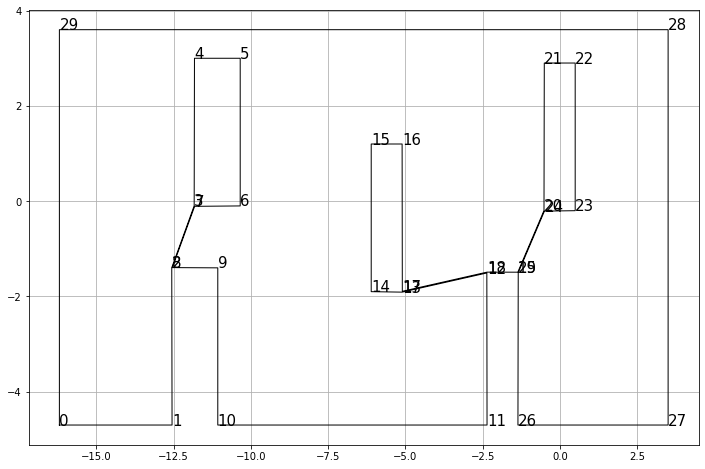

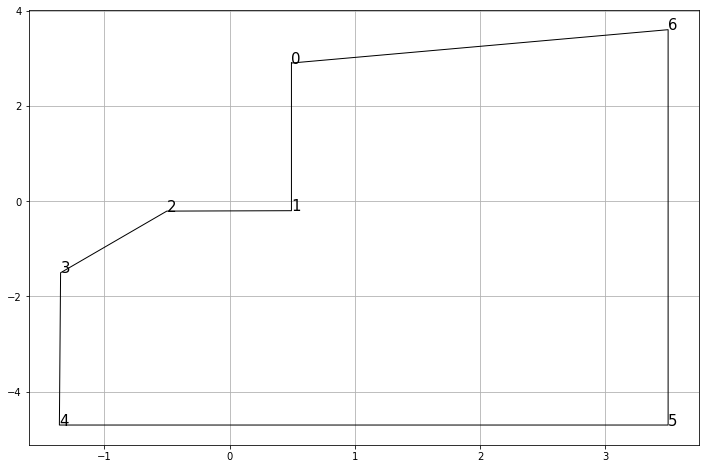

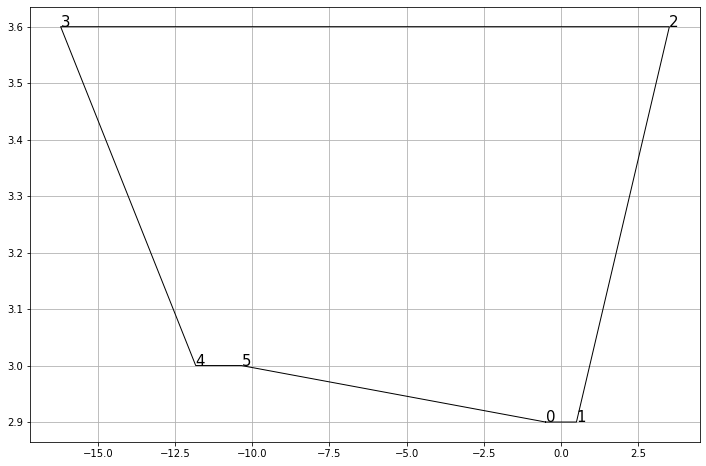

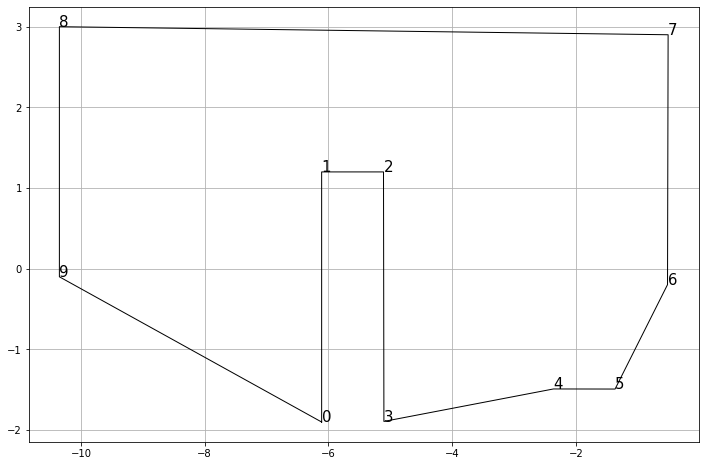

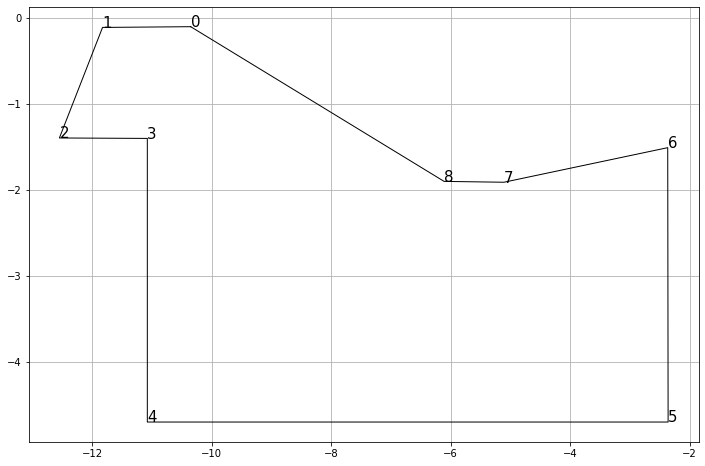

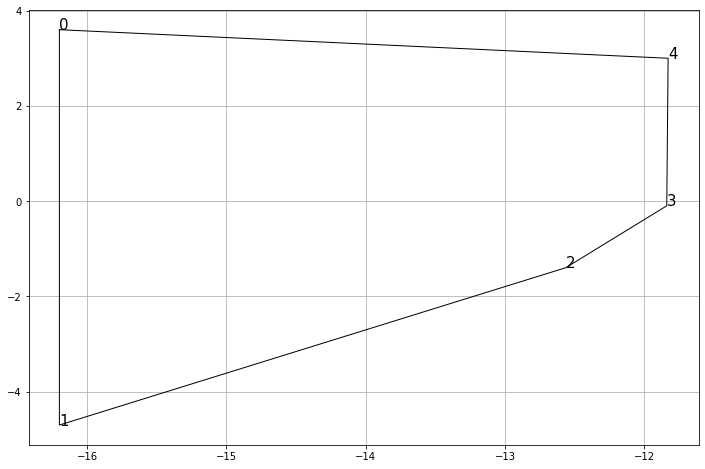

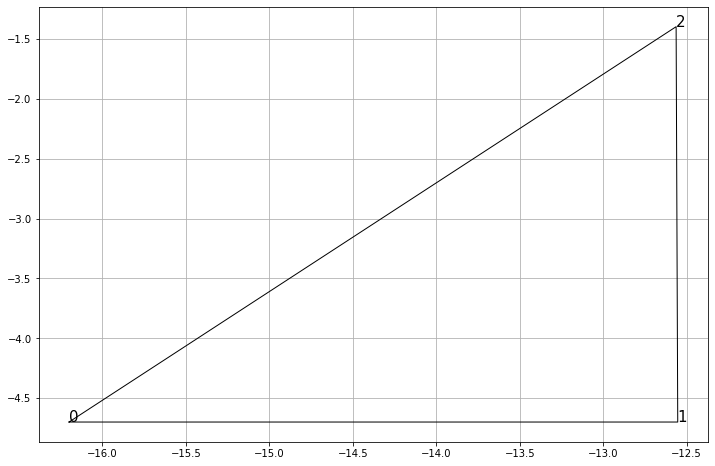

/root/mfboTrajectory/mfboTrajectory/utilsConvexDecomp.py:634: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



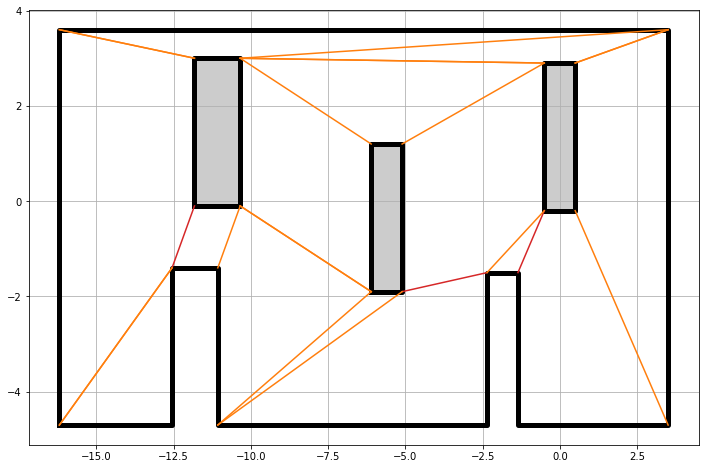

In [9]:
#!/usr/bin/env python
# coding: utf-8
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os, sys, time, copy, argparse
import numpy as np
import yaml
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
sys.path.insert(0, '../')

from mfboTrajectory.utilsConvexDecomp import *
from mfboTrajectory.utilsConvexDecomp import _Polygon

points_set = [
    [[-16.2,-4.7],
     [-12.5538,-4.7],[-12.5538,-1.4],[-11.0738,-1.4],[-11.0738,-4.7], 
     [-2.36013,-4.7],[-2.36013,-1.5],[-1.36013,-1.5],[-1.36013,-4.7], 
     [3.5,-4.7],[3.5,3.6],[-16.2,3.6]],
    [[-11.8283,-0.1],[-11.8283,3.0],[-10.3483,3.0],[-10.3483,-0.1]],
    [[-6.10849,-1.9],[-6.10849,1.2],[-5.10849,1.2],[-5.10849,-1.9]],
    [[-0.507314,-0.2],[-0.507314,2.9],[0.492686,2.9],[0.492686,-0.2]],
]

# main
sample_name = "test_polytopes"
result_dir = './mfbo_data/{}'.format(sample_name)
if not os.path.exists(result_dir):
    os.mkdir(result_dir)
_poly = _Polygon(points_set)

initial_point = [-14.6,-2.5]
final_point = [0.6,-3.0]
_poly.plot_approx()

# CCW manual cut
decomp_edge = _poly.decomp(manual_cut=[
    [[28,22]],
    [[5,21],[22,28],[29,4]],
    [[6,14],[21,5]],
    [[14,6]],
    [[4,29],[0,2]],
    [[2,0]]])
_poly.save_decomp(decomp_edge, filedir='./mfbo_data/{}'.format(sample_name), filename='polygon_info.yaml')
decomp_edge = _poly.load_decomp(filedir='./mfbo_data/{}'.format(sample_name), filename='polygon_info.yaml')
_poly.plot(decomp_edge)


In [25]:
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

from mfboTrajectory.minSnapTrajectoryPolytopes import MinSnapTrajectoryPolytopes
from mfboTrajectory.multiFidelityModelPolytopes import get_waypoints_plane

with open("final_traj_13_run3.npy", "rb") as f:
    t_set_sim1 = np.load(f)
    d_ordered1 = np.load(f)
    d_ordered_yaw1 = np.load(f)
with open("final_traj_14_run3.npy", "rb") as f:
    t_set_sim2 = np.load(f)
    d_ordered2 = np.load(f)
    d_ordered_yaw2 = np.load(f)
# with open("traj_14_init_dataset.npy", "rb") as f:
#     X_L = np.load(f)
#     Y_L = np.load(f)
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')

    # # Separate feasible and unfeasible points
    # feasible = Y_L == 1
    # unfeasible = Y_L == 0

    # # Plot feasible points
    # ax.scatter(X_L[feasible, 0], X_L[feasible, 1], X_L[feasible, 2], c='g', label='Feasible')

    # # Plot unfeasible points
    # ax.scatter(X_L[unfeasible, 0], X_L[unfeasible, 1], X_L[unfeasible, 2], c='r', label='Unfeasible')

    # # Add labels and legend
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')
    # ax.legend()

    
    # # Plot yaw as quiver
    # ax.quiver(X_L[feasible, 0], X_L[feasible, 1], X_L[feasible, 2], 
    #           np.cos(X_L[feasible, 3]), np.sin(X_L[feasible, 3]), np.zeros_like(X_L[feasible, 3]), 
    #           color='g', length=0.05, normalize=True)
    # ax.quiver(X_L[unfeasible, 0], X_L[unfeasible, 1], X_L[unfeasible, 2], 
    #           np.cos(X_L[unfeasible, 3]), np.sin(X_L[unfeasible, 3]), np.zeros_like(X_L[unfeasible, 3]), 
    #           color='r', length=0.05, normalize=True)
    # plt.show()
polygon_filedir = './constraints_data'
polygon_filename = 'polytopes_constraints.yaml'
points1, plane_pos_set1, t_set_sta1, waypoints1 = get_waypoints_plane(polygon_filedir, polygon_filename, "traj_13", flag_t_set=True)
points2, plane_pos_set2, t_set_sta2, waypoints2 = get_waypoints_plane(polygon_filedir, polygon_filename, "traj_14", flag_t_set=True)
poly = MinSnapTrajectoryPolytopes(drone_model="default", yaw_mode=0, qp_optimizer="osqp")
# poly.plot_trajectory(t_set_sim1, d_ordered1, plane_pos_set1)
# poly.plot_trajectory(t_set_sim2, d_ordered2, plane_pos_set2)
poly.plot_trajectory_multi(t_set_sim1, d_ordered1, plane_pos_set1, t_set_sim2, d_ordered2, plane_pos_set2)

# fig = plt.figure(1,figsize=(5,5))
# plt.clf()
# fig.set_size_inches((5,5))
# ax = plt.subplot(111)
# lb=0.6
# ub=1.4
# X_L_denorm_ = lb + X_L*(ub-lb)
# X_L_time_ = np.multiply(X_L_denorm_, np.repeat(np.expand_dims(t_set_sim,0),X_L_denorm_.shape[0],axis=0))


# plt.scatter(X_L_time_[:,0], X_L_time_[:,1], c = Y_L, cmap='coolwarm_r', marker = 'x', label = 'low fidelity sample')

# plt.legend(frameon = False)

# plt.xlim([lb*t_set_sim[0],ub*t_set_sim[0]])
# plt.ylim([lb*t_set_sim[1],ub*t_set_sim[1]])
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# print("hell")
# prettyplot_tmp("$\mathregular{x_1}$ [s]", "$\mathregular{x_2}$ [s]", ylabelpad=-15)
# plt.tight_layout()
# # plt.savefig("./mfbo_data/rand_mini1_yaw/init_data.png")
# plt.show()
# plt.close()


# Select polygons connecting the initial and final position

In [10]:

#!/usr/bin/env python
# coding: utf-8
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os, sys, time, copy, argparse
import yaml
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '../')
from mfboTrajectory.utilsConvexDecomp import *

# Generate graph
#  - Generate convex polygon group
#  - Find start, end polygon
#  - generate graph
sample_name = "test_polytopes"
filedir_t = './mfbo_data/{}'.format(sample_name)
filename_info_t = 'polygon_info.yaml'
filename_path_t = 'polygon_path.yaml'

# e0
initial_point = [-14.6,-2.5]
final_point = [0.6,-3.0]
manual_polygon_set = []

points_set, original_edge, decomp_edge = load_decomp_data( \
    filedir=filedir_t, filename=filename_info_t)

# Generate polygon set
polygon_set = get_polygon_set(points_set, original_edge, decomp_edge)
if len(manual_polygon_set) > 0:
    polygon_set += manual_polygon_set
print("num polygon: ",len(polygon_set))

# Get polygon path
face_vertex, face_graph, polygon_path = get_polygon_path(\
    points_set, original_edge, decomp_edge, \
    polygon_set, initial_point, final_point)

# Save & load result
save_polygon_path(points_set, polygon_set, face_vertex, polygon_path, \
    initial_point, final_point, \
    filedir=filedir_t, \
    filename=filename_path_t, \
    sample_name=sample_name)

points_set, polygon_set, face_vertex, polygon_path, initial_point, final_point \
    = load_polygon_path(filedir=filedir_t, filename=filename_path_t, sample_name=sample_name)

# Plot result
for p_mode in range(5):
    plot_polygon_path(points_set, polygon_set, \
        face_vertex, face_graph, polygon_path, \
        initial_point, final_point, plot_mode=p_mode, flag_save=True, \
        points_set_plot=points_set, \
        save_dir="../mfbo_data/{}/convex_decomp_step_{}.pdf".format(sample_name, p_mode))

num polygon:  14
initial_polygon_idx:  12 , final_polygon_idx:  2


/root/mfboTrajectory/mfboTrajectory/utilsConvexDecomp.py:668: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



KeyError: 'types'

In [12]:
#!/usr/bin/env python
# coding: utf-8
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os, sys, time, copy, argparse
import numpy as np
import yaml
import matplotlib.pyplot as plt

sys.path.insert(0, '../')
from pyTrajectoryUtils.pyTrajectoryUtils.utils import *

from mfboTrajectory.minSnapTrajectoryPolytopes import MinSnapTrajectoryPolytopes
from mfboTrajectory.multiFidelityModelPolytopes import get_waypoints_plane, meta_low_fidelity, meta_high_fidelity, get_dataset_init, check_dataset_init
from mfboTrajectory.utilsConvexDecomp import *
from mfboTrajectory.utilsConvexDecomp import _Polygon, _Point

sample_name_t = "test_polytopes"
filedir_t = './mfbo_data/{}'.format(sample_name_t)
filename_info_t = 'polygon_info.yaml'
filename_path_t = 'polygon_path.yaml'
points_set, polygon_set, face_vertex, polygon_path, initial_point, final_point \
    = load_polygon_path(filedir=filedir_t, filename=filename_path_t, sample_name=sample_name_t)

unit_height_t = 1
plane_pos_set, polygon_path_points = get_plane_pos_set( \
    points_set, polygon_set, face_vertex, \
    polygon_path, initial_point, final_point, \
    unit_height_t)

plot_plane_pos_set( \
    points_set, polygon_set, face_vertex, \
    polygon_path, initial_point, final_point, \
    plane_pos_set, polygon_path_points)

# points, plane_pos_set = get_waypoints_plane(filedir_t, filename_path_t, flag_t_set=False)
###################################################### 
points = np.array(polygon_path_points)
t_set = np.ones(points.shape[0]-1)

traj_tool = TrajectoryTools(N_POINTS=40)
min_snap = MinSnapTrajectoryPolytopes(N_POINTS=40, drone_model="default", qp_optimizer='osqp')

###################################################### 
# Check optimizer license - Other optimizers can be used for QP. In our experiments, gurobi optimzier was used. 
# Changing qp_optimizer can be done in MinSnapTrajecotoryPolytopes declaration
try:
    import gurobipy
    model = gurobipy.Model()
except:
    prRed("No gurobi license")

#######################################################
# Min snap trajectory
# Input
#   alpha_scale - scale overall time with alpha_scale value
#   yaw_mode - 0: set all yaw to 0, 1: set trajectory yaw forward, 2: set trajectory yaw as the reference yaw (points[:,3])
#   flag_loop - whether the trajectory has same initial and final position and attitude
#   deg_init_min, deg_init_max - the initial state is set to 0 from deg_init_min - th derivative to deg_init_max - th derivative
#       (e.g. deg_init_min=0, deg_init_max=2: initial position is set to points[0,:] and initial velocity, acceleration is set to zero)
#   deg_end_min, deg_end_max - the final state is set to 0 from deg_end_min - th derivative to deg_end_max - th derivative
#   ded_init_yaw_min=0, deg_init_yaw_max - set the initial yaw value and it's derivative to zero
#   ded_end_yaw_min=0, deg_end_yaw_max - set the fianl yaw value and it's derivative to zero
#   t_set_init - initial values for time allocation between waypoints
#   flag_fixed_end_point - flag whether to fixed the end points position. If false, starting and finishing points will be located in the corresponding polytope.
#   flag_rand_init - whether to use random initialization on optimization process. 
#       (randomly generate set of time allocation and select the on minimze the overall snap)
#   flag_numpy_opt - whether to use numpy-based gradient descent to find initial value (often improve the final result).
# Output
#   t_set - time allocation between waypoints
#   d_ordered - position and derivatives on each waypoint
#   d_ordered_yaw - yaw value and angular speed, acceleration on each waypoint
t_set, d_ordered, d_ordered_yaw = min_snap.get_min_snap_traj(
    points, plane_pos_set, alpha_scale=1.0, flag_loop=False, yaw_mode=0, \
    deg_init_min=0, deg_init_max=4, \
    deg_end_min=0, deg_end_max=4, \
    deg_init_yaw_min=0, deg_init_yaw_max=2, \
    deg_end_yaw_min=0, deg_end_yaw_max=2, \
    t_set_init=None, \
    flag_fixed_end_point=True, \
    flag_rand_init=True, flag_numpy_opt=False)
print("t_set = np.array([{}])".format(','.join([str(x) for x in t_set])))
print("########################################################")
t_set_sta = t_set

##################################
# Save t_set into polygon_path.yaml (Copy this file into the constraints_data for mfbo optimization)
save_polygon_path(points_set, polygon_set, face_vertex, polygon_path, \
    initial_point, final_point, \
    filedir=filedir_t, \
    filename=filename_path_t, \
    sample_name=sample_name_t, t_set=t_set_sta)

##################################
# Change trajectory speed
# multiply alpha_set with t_set and generate new d_orderd (derivates on each waypoints) and d_ordered_yaw
# Check pyTrajectoryUtils/MinSnapTrajectoryUtils class for the details
# Set yaw_mode - 0: set all yaw to 0, 1: set trajectory yaw forward, 2: set trajectory yaw as the reference yaw (points[:,3])
t_set_new, d_ordered, d_ordered_yaw = \
    min_snap.update_traj(\
        t_set, points=points, \
        plane_pos_set=plane_pos_set, \
        alpha_set=2.0*np.ones_like(t_set), yaw_mode=0, \
        flag_run_sim=False, \
        flag_fixed_end_point=True, \
        flag_fixed_point=False)
print("t_set_new = np.array([{}])".format(','.join([str(x) for x in t_set_new])))
print("########################################################")

########################################################
# Low and High fidelity check
max_col_err = 0.03
N_trial=50

low_fidelity = lambda x, debug=True, multicore=False: \
    meta_low_fidelity(min_snap, x, t_set, points, plane_pos_set, debug, lb=0.1, ub=1.9, \
        multicore=multicore)
high_fidelity = lambda x, return_snap=False, multicore=False: \
    meta_high_fidelity(min_snap, x, t_set_new, points, plane_pos_set, points_set_collision, lb=0.1, ub=1.9, \
        return_snap=return_snap, multicore=multicore, \
        max_col_err=max_col_err, N_trial=N_trial)

print("low fidelity evaluation : ",min_snap.sanity_check(t_set_new, d_ordered, d_ordered_yaw, flag_parallel=True))
print("high fidelity evaluation : ",min_snap.run_sim_loop(t_set_new, d_ordered, d_ordered_yaw, \
    plane_pos_set, max_pos_err=0.2, max_col_err=max_col_err, N_trial=N_trial))
print("########################################################")
########################################################
# Debug tools
traj_tool.plot_trajectory(t_set_new, d_ordered, d_ordered_yaw, flag_save=False)
traj_tool.save_trajectory_yaml(t_set, d_ordered, d_ordered_yaw, \
                          traj_dir="../trajectory/", \
                          traj_name="test")

########################################################
fig, axs = plt.subplots(1,1)
fig.set_size_inches((6,5))
traj_tool.plot_trajectory_2D_single(axs, t_set_new, d_ordered, d_ordered_yaw)
plt.show()

########################################################
print("max speed:")
traj_tool.get_max_speed(t_set_new, d_ordered, flag_print=True)

########################################################
traj_tool.plot_trajectory_animation(t_set_new, d_ordered, d_ordered_yaw, \
        flag_save=False, save_dir='../mfbo_data', save_file='test')

########################################################
status_t, waypoints_t = min_snap.get_plot_points(t_set_new, d_ordered)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

x_max = np.max(np.array(points_set[0])[:,0])
x_min = np.min(np.array(points_set[0])[:,0])
y_max = np.max(np.array(points_set[0])[:,1])
y_min = np.min(np.array(points_set[0])[:,1])
point_bg = np.array([[x_min,y_min],[x_max,y_min],[x_max,y_max],[x_min,y_max],[x_min,y_min]])
ax.plot(point_bg[:,0], point_bg[:,1], '-', linewidth=5, color='black')
ax.fill(point_bg[:,0], point_bg[:,1], color='black', alpha=0.2)

# Plot background
for i in range(len(points_set)):
    point_x = np.zeros(len(points_set[i])+1)
    point_y = np.zeros(len(points_set[i])+1)
    for j in range(len(points_set[i])):
        point_x[j] = points_set[i][j][0]
        point_y[j] = points_set[i][j][1]
    point_x[-1] = points_set[i][0][0]
    point_y[-1] = points_set[i][0][1]
    if i == 0:
        ax.plot(point_x, point_y, '-', linewidth=5, color='black')
        ax.fill(point_x, point_y, color='white', alpha=1.0)
    else:
        ax.plot(point_x, point_y, '-', linewidth=5, color='black')
        ax.fill(point_x, point_y, color='black', alpha=0.2)

# Plot initial and final point
plt.scatter(initial_point[0], initial_point[1], s=300, c='tab:green', marker=(5, 1))
plt.text(initial_point[0], initial_point[1]+0.3, "start", fontsize=20, ha='center')
plt.scatter(final_point[0], final_point[1], s=300, c='tab:red', marker=(5, 1))
plt.text(final_point[0], final_point[1]+0.3, "end", fontsize=20, ha='center')

# Plot convex polygon decomposition
for _poly_idx, _poly in enumerate(polygon_set):
    point_x = np.zeros(len(_poly)+1)
    point_y = np.zeros(len(_poly)+1)
    for idx, vtx in enumerate(_poly):
        point_x[idx] = points_set[vtx[0]][vtx[1]][0]
        point_y[idx] = points_set[vtx[0]][vtx[1]][1]
    point_x[-1] = points_set[_poly[0][0]][_poly[0][1]][0]
    point_y[-1] = points_set[_poly[0][0]][_poly[0][1]][1]
    ax.plot(point_x, point_y, '-', linewidth=1, color='black')
    if _poly_idx in polygon_path:
        ax.fill(point_x, point_y, color='tab:orange', alpha=0.2)

ax.plot(status_t[:,0], status_t[:,1], '--', linewidth=2, color='blue', label='Initial trajectory')
for i in range(len(waypoints_t)):
    ax.scatter(waypoints_t[i,0], waypoints_t[i,1], s=50, color='tab:blue', zorder=2)

plt.axis('off')
plt.legend(loc=1, fontsize=20)
plt.show()
plt.pause(0.1)


KeyError: 'types'

# Plot optimization result

In [ ]:
#!/usr/bin/env python
# coding: utf-8
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import os, sys, copy, yaml
from matplotlib import pyplot as plt
from matplotlib import ticker

sys.path.insert(0, '../')
from pyTrajectoryUtils.pyTrajectoryUtils.utils import *
from mfboTrajectory.multiFidelityModelPolytopes import \
    get_waypoints_plane, get_dataset_init, check_dataset_init, meta_get_waypoints_alpha
from mfboTrajectory.minSnapTrajectoryPolytopes import MinSnapTrajectoryPolytopes

min_snap = MinSnapTrajectoryPolytopes(MAX_POLY_DEG = 9, MAX_SYS_DEG = 4, N_POINTS = 40)

def get_min_time_array(filedir, filename, MAX_ITER=50):
    yamlFile = os.path.join(filedir, filename)
    min_time_array = []
    num_failure = 0
    with open(yamlFile, "r") as input_stream:
        yaml_in = yaml.load(input_stream)
        for i in range(MAX_ITER+1):
            if 'iter{}'.format(i) in yaml_in:
                min_time_array.append(np.float(yaml_in['iter{}'.format(i)]['min_time']))
                if 'exp_result' in yaml_in['iter{}'.format(i)]:
                    num_failure += 1-np.float(yaml_in['iter{}'.format(i)]['exp_result'])
    
    return min_time_array, num_failure


def get_snap_array(filedir, filename, points, plane_pos_set, t_set_sim, MAX_ITER=50):
    yamlFile = os.path.join(filedir, filename)
    min_time_array = []
    snap_array = []
    snap_min = 1.0
    num_failure = 0
    with open(yamlFile, "r") as input_stream:
        yaml_in = yaml.load(input_stream)
        for i in range(MAX_ITER+1):
            if 'iter{}'.format(i) in yaml_in:
                min_time_array.append(np.float(yaml_in['iter{}'.format(i)]['min_time']))
                if len(min_time_array) == 1 or min_time_array[-2] > min_time_array[-1]:
                    alpha_set = np.array(yaml_in['iter{}'.format(i)]['alpha_cand'])
                    _, _, _, snap = \
                        min_snap.update_traj(\
                            t_set_sim, points=points, \
                            plane_pos_set=plane_pos_set, \
                            alpha_set=alpha_set, yaw_mode=0, \
                            flag_run_sim=False, \
                            flag_fixed_end_point=True, \
                            flag_fixed_point=False, flag_return_snap=True)
                    snap_min = np.sum(snap)
                snap_array.append(snap_min)
                
                if 'exp_result' in yaml_in['iter{}'.format(i)]:
                    num_failure += 1-np.float(yaml_in['iter{}'.format(i)]['exp_result'])
    
    return min_time_array, num_failure, snap_array

sample_name = ['traj_9']
model_name = ['test_polytopes']
rand_seed = [123]

lb = 0.1
ub = 1.9
MAX_ITER = 5

if True:
    data_to_save = np.zeros((len(sample_name),4,MAX_ITER+1))

    for sample_idx_, sample_name_ in enumerate(sample_name[:]):
        polygon_filedir = '../constraints_data'
        polygon_filename = 'polytopes_constraints.yaml'
        points, plane_pos_set, t_set_sta = get_waypoints_plane(polygon_filedir, polygon_filename, sample_name_, flag_t_set=True)
        t_dim = t_set_sta.shape[0]
        res_init, data_init = check_dataset_init(sample_name_+"_yaw_zero", t_dim, N_L=1000, N_H=20, \
                                    lb=lb, ub=ub, sampling_mode=2, dataset_dir="../mfbo_data")
        if res_init:
            alpha_sim, X_L, Y_L, X_H, Y_H = data_init
            t_set_sim = t_set_sta*alpha_sim
        else:
            continue
        
        for model_idx_, model_name_ in enumerate(model_name[:]):
            test_data = np.empty((0,MAX_ITER+1))
            test_data_snap = np.empty((0,MAX_ITER+1))
            mean_failure = 0
            for rand_seed_ in rand_seed[:]:
                data, num_failure, data_snap = \
                    get_snap_array('../mfbo_data/{}_yaw_zero'.format(sample_name_), \
                        'result_{}_{}.yaml'.format(model_name_, rand_seed_), \
                        points, plane_pos_set, t_set_sim)
                mean_failure += num_failure
                if len(data) < MAX_ITER+1:
                    print("Incomplete result: {}_{}_{}".format(sample_name_[sample_idx_],\
                                                    model_name_,rand_seed_))

                test_data = np.append(test_data, np.expand_dims(data[:MAX_ITER+1],0), axis=0)
                test_data_snap = np.append(test_data_snap, np.expand_dims(data_snap[:MAX_ITER+1],0), axis=0)

            test_data_mean = test_data.mean(axis=0)
            test_data_std = test_data.std(axis=0)
            test_data_snap_mean = test_data_snap.mean(axis=0)
            test_data_snap_std = test_data_snap.std(axis=0)
            mean_failure /= (1.0*len(rand_seed))
            print(mean_failure)
            data_to_save[sample_idx_,0,:] = test_data_mean
            data_to_save[sample_idx_,1,:] = test_data_std
            data_to_save[sample_idx_,2,:] = test_data_snap_mean
            data_to_save[sample_idx_,3,:] = test_data_snap_std

            yamlFile = '../mfbo_data/{}_{}_result_plot.yaml'.format(sample_name_, model_name_)
            yaml_out = open(yamlFile,"w")
            yaml_out.write("data:\n")
            for it in range(len(sample_name)):
                yaml_out.write("  - [{}]\n".format(', '.join([str(x) for x in data_to_save[it,0,:]])))
                yaml_out.write("  - [{}]\n".format(', '.join([str(x) for x in data_to_save[it,1,:]])))
                yaml_out.write("  - [{}]\n".format(', '.join([str(x) for x in data_to_save[it,2,:]])))
                yaml_out.write("  - [{}]\n".format(', '.join([str(x) for x in data_to_save[it,3,:]])))
            yaml_out.write("\n")
            yaml_out.close()

fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for sample_idx_, sample_name_ in enumerate(sample_name[:]):
    for model_idx_, model_name_ in enumerate(model_name[:]):
        yamlFile = '../mfbo_data/{}_{}_result_plot.yaml'.format(sample_name_, model_name_)
        test_data = np.zeros((len(sample_name),4,MAX_ITER+1))
        with open(yamlFile, "r") as input_stream:
            yaml_in = yaml.load(input_stream)
            data_raw = np.array(yaml_in["data"])

        for i in range(len(sample_name)):
            test_data[i,0,:] = data_raw[i*4]
            test_data[i,1,:] = data_raw[i*4+1]
            test_data[i,2,:] = data_raw[i*4+2]
            test_data[i,3,:] = data_raw[i*4+3]

        test_data_mean = test_data[sample_idx_,0,:]
        test_data_std = test_data[sample_idx_,1,:]
        test_data_snap_mean = test_data[sample_idx_,2,:]
        test_data_snap_std = test_data[sample_idx_,3,:]

        ax1.plot(range(test_data_mean.shape[0]), test_data_mean, '-', \
                 label='{}'.format(sample_name_[sample_idx_]))
        ax1.fill_between(range(test_data_mean.shape[0]), \
                         test_data_mean-test_data_std, test_data_mean+test_data_std, \
                         alpha=0.2)
        ax2.plot(range(test_data_snap_mean.shape[0]), test_data_snap_mean, \
                 '-', label='{}'.format(sample_name_[sample_idx_]))
        ax2.fill_between(range(test_data_snap_mean.shape[0]), \
                         test_data_snap_mean-test_data_snap_std, test_data_snap_mean+test_data_snap_std, \
                         alpha=0.2)

ax1.set_title("Simulation result of polytopes trajectory", {'fontsize':20}, y=1.02)
ax1.set_ylabel("Relative flight time", {'fontsize':16})
ax1.set_xlabel("Iterations", {'fontsize':16})
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.set_ylabel("Relative smoothness", {'fontsize':16})
ax2.set_xlabel("Iterations", {'fontsize':16})
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.50))
plt.tight_layout()
plt.show()
plt.pause(1e-6)

KeyError: 'traj_9'

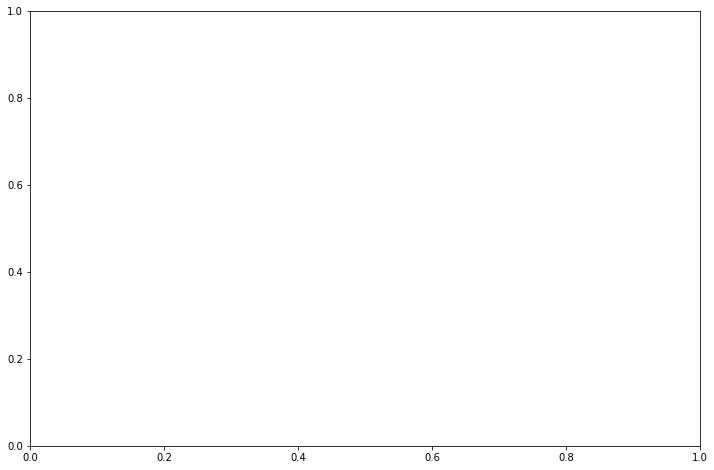

In [ ]:
#!/usr/bin/env python
# coding: utf-8
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import os, sys, copy, yaml
from matplotlib import pyplot as plt
from matplotlib import ticker

sys.path.insert(0, '../')
from pyTrajectoryUtils.pyTrajectoryUtils.utils import *
from mfboTrajectory.multiFidelityModelPolytopes import check_dataset_init
from mfboTrajectory.minSnapTrajectoryPolytopes import MinSnapTrajectoryPolytopes
from mfboTrajectory.multiFidelityModelPolytopes import \
    get_waypoints_plane, get_dataset_init, check_dataset_init

from mfboTrajectory.utilsConvexDecomp import *
from mfboTrajectory.utilsConvexDecomp import _Polygon, _Point


def get_min_alpha(filedir, filename, MAX_ITER=50):
    yamlFile = os.path.join(filedir, filename)
    min_time_array = []
    num_failure = 0
    with open(yamlFile, "r") as input_stream:
        yaml_in = yaml.load(input_stream)
        min_alpha = np.ones_like(np.array(yaml_in['iter{}'.format(0)]['alpha_cand']))
        for i in range(MAX_ITER+1):
            if 'iter{}'.format(i) in yaml_in:
                min_time_array.append(np.float(yaml_in['iter{}'.format(i)]['min_time']))
                if len(min_time_array) == 1 or min_time_array[-2] > min_time_array[-1]:
                    min_alpha = copy.deepcopy(np.array(yaml_in['iter{}'.format(i)]['alpha_cand']))
    
    return min_time_array, min_alpha

traj_tool = TrajectoryTools(N_POINTS=40)
min_snap = MinSnapTrajectoryPolytopes(N_POINTS=40, drone_model="default")

flag_plot_opt = True

sample_name = ['traj_9']
model_name = ['test_polytopes']
rand_seed = [123]

lb = 0.1
ub = 1.9
MAX_ITER = 5

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
model_name_ = model_name[0]
sample_idx = 0
sample_name_ = sample_name[sample_idx]

polygon_filedir = '../constraints_data'
polygon_filename = 'polytopes_constraints.yaml'
points_set, polygon_set, face_vertex, polygon_path, initial_point, final_point \
    = load_polygon_path(filedir=polygon_filedir, filename=polygon_filename, sample_name=sample_name_)

unit_height_t = 1
plane_pos_set, polygon_path_points = get_plane_pos_set( \
    points_set, polygon_set, face_vertex, \
    polygon_path, initial_point, final_point, \
    unit_height_t)
points, plane_pos_set, t_set_sta = get_waypoints_plane(polygon_filedir, polygon_filename, sample_name_, flag_t_set=True)

t_dim = t_set_sta.shape[0]
res_init, data_init = check_dataset_init(sample_name_+"_yaw_zero", t_dim, N_L=1000, N_H=20, \
                            lb=lb, ub=ub, sampling_mode=2, dataset_dir="../mfbo_data")
if res_init:
    alpha_sim, X_L, Y_L, X_H, Y_H = data_init
    t_set_sim = t_set_sta*alpha_sim
else:
    prRed("No initial data set.")

N_POLY = t_set_sta.shape[0]

t_set_new, d_ordered, d_ordered_yaw = \
    min_snap.update_traj(\
        t_set_sim, points=points, \
        plane_pos_set=plane_pos_set, \
        alpha_set=1.00*np.ones_like(t_set_sim), yaw_mode=0, \
        flag_run_sim=False, \
        flag_fixed_end_point=True, \
        flag_fixed_point=False)
status_t, waypoints_t = min_snap.get_plot_points(t_set_new, d_ordered)


if flag_plot_opt:
    test_data_pos = np.empty((0,min_snap.N_POINTS*t_set_sim.shape[0],2))
    test_data_alpha = np.empty((0,t_set_sim.shape[0]))
    for rand_seed_ in rand_seed[:]:
        min_time_array_t, min_alpha_t = get_min_alpha(
            '../mfbo_data/{}_yaw_zero'.format(sample_name_), \
            'result_{}_{}.yaml'.format(model_name_, rand_seed_))        
        t_set, d_ordered, d_ordered_yaw = \
                min_snap.update_traj(\
                    t_set_sim, points=points, \
                    plane_pos_set=plane_pos_set, \
                    alpha_set=min_alpha_t, yaw_mode=0, \
                    flag_run_sim=False, \
                    flag_fixed_end_point=True, \
                    flag_fixed_point=False, flag_return_snap=False)
        V_t = min_snap.generate_sampling_matrix(t_set, N=min_snap.N_POINTS, der=0)
        val = V_t.dot(d_ordered)

        test_data_pos = np.append(test_data_pos, np.expand_dims(val[:,:2],0), axis=0)
        test_data_alpha = np.append(test_data_alpha, np.expand_dims(min_alpha_t,0), axis=0)

    test_data_mean = test_data_pos.mean(axis=0)
    test_data_std_1 = np.zeros_like(test_data_mean)
    test_data_std_2 = np.zeros_like(test_data_mean)
    for it_sample in range(min_snap.N_POINTS*t_set_sim.shape[0]):
        if test_data_pos.shape[0] == 1:
            w = [0.]
            v = np.array([[1.]])
        else:
            cov_t = np.cov(test_data_pos[:,it_sample,:].T)
            w, v = np.linalg.eig(cov_t)
        idx_w = np.argmax(w)
        w_max = np.sqrt(w[idx_w])
        v_max = v[idx_w,:]
        test_data_std_1[it_sample,:] = test_data_mean[it_sample,:] + w_max*v_max
        test_data_std_2[it_sample,:] = test_data_mean[it_sample,:] - w_max*v_max
    test_data_mean_alpha = test_data_alpha.mean(axis=0)
    waypoints_opt_t = np.zeros((t_set_sim.shape[0]+1,2))
    for it_sample in range(t_set_sim.shape[0]):
        waypoints_opt_t[it_sample,:] = test_data_mean[it_sample*min_snap.N_POINTS,:]
    status_opt_t = copy.deepcopy(test_data_mean)
    status_opt_t_std = np.append(test_data_std_1, np.flip(test_data_std_2, axis=0), axis=0)
    waypoints_opt_t[-1,:] = test_data_mean[-1,:]

x_max = np.max(np.array(points_set[0])[:,0])
x_min = np.min(np.array(points_set[0])[:,0])
y_max = np.max(np.array(points_set[0])[:,1])
y_min = np.min(np.array(points_set[0])[:,1])
point_bg = np.array([[x_min,y_min],[x_max,y_min],[x_max,y_max],[x_min,y_max],[x_min,y_min]])
ax.plot(point_bg[:,0], point_bg[:,1], '-', linewidth=5, color='black')
ax.fill(point_bg[:,0], point_bg[:,1], color='black', alpha=0.2)

# Plot background
for i in range(len(points_set)):
    point_x = np.zeros(len(points_set[i])+1)
    point_y = np.zeros(len(points_set[i])+1)
    for j in range(len(points_set[i])):
        point_x[j] = points_set[i][j][0]
        point_y[j] = points_set[i][j][1]
    point_x[-1] = points_set[i][0][0]
    point_y[-1] = points_set[i][0][1]
    if i == 0:
        ax.plot(point_x, point_y, '-', linewidth=5, color='black')
        ax.fill(point_x, point_y, color='white', alpha=1.0)
    else:
        ax.plot(point_x, point_y, '-', linewidth=5, color='black')
        ax.fill(point_x, point_y, color='black', alpha=0.2)

# Plot initial and final point
plt.scatter(initial_point[0], initial_point[1], s=300, c='tab:green', marker=(5, 1), zorder=2)
plt.text(initial_point[0], initial_point[1]+0.3, "start", fontsize=20, ha='center')
plt.scatter(final_point[0], final_point[1], s=300, c='tab:red', marker=(5, 1), zorder=2)
plt.text(final_point[0], final_point[1]+0.3, "end", fontsize=20, ha='center')

# Plot convex polygon decomposition
for _poly_idx, _poly in enumerate(polygon_set):
    point_x = np.zeros(len(_poly)+1)
    point_y = np.zeros(len(_poly)+1)
    for idx, vtx in enumerate(_poly):
        point_x[idx] = points_set[vtx[0]][vtx[1]][0]
        point_y[idx] = points_set[vtx[0]][vtx[1]][1]
    point_x[-1] = points_set[_poly[0][0]][_poly[0][1]][0]
    point_y[-1] = points_set[_poly[0][0]][_poly[0][1]][1]
    ax.plot(point_x, point_y, '-', linewidth=1, color='black')
    if _poly_idx in polygon_path:
        ax.fill(point_x, point_y, color='tab:orange', alpha=0.2)

if flag_plot_opt:
    ax.fill(status_opt_t_std[:,0], status_opt_t_std[:,1], color='red', alpha=0.2)

ax.plot(status_t[:,0], status_t[:,1], '--', linewidth=2, color='blue', label='Initial trajectory')
for i in range(len(waypoints_t)-1):
    ax.scatter(waypoints_t[i,0], waypoints_t[i,1], s=70, color='tab:blue', zorder=2)

if flag_plot_opt:
    ax.plot(status_opt_t[:,0], status_opt_t[:,1], '--', linewidth=2, color='red', label='Final trajectory')
    for i in range(len(waypoints_opt_t)-1):
        ax.scatter(waypoints_opt_t[i,0], waypoints_opt_t[i,1], s=70, color='tab:red', zorder=2)

ax.tick_params(axis='both', which='major', labelsize='22')
ax.grid(True)

plt.tight_layout()
plt.show()
plt.pause(0.1)
